# Project on ECG signal
#Name-rahul prakash
#Mtech_SPML


#**project-1**

The ECG signal is given in MATLAB file format as “givenECG3.mat”. Sampling frequency is 360 Hz.

(a) Detect the R-peak in each beat of the ECG signal.

(b) Evaluate the RR-interval between the consecutive beats of the ECG signal.

(c) Derive the heart rate signal from the ECG (i.e., Plot between the RR-interval and time).

(d) Evaluate the mean and standard deviation value of the heart rate signal.

In [ ]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('givenECG3.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017',
 '__version__': '1.0',
 '__globals__': [],
 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

In [ ]:
ECG =  mat['givenECG3']


In [ ]:
ECG , ECG.shape

(array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16), (1, 3600))

In [ ]:
ecg=np.arange(ECG.size)
ECG=ECG.reshape(3600)
ECG, ecg

(array([995, 995, 995, ..., 946, 944, 943], dtype=uint16),
 array([   0,    1,    2, ..., 3597, 3598, 3599]))

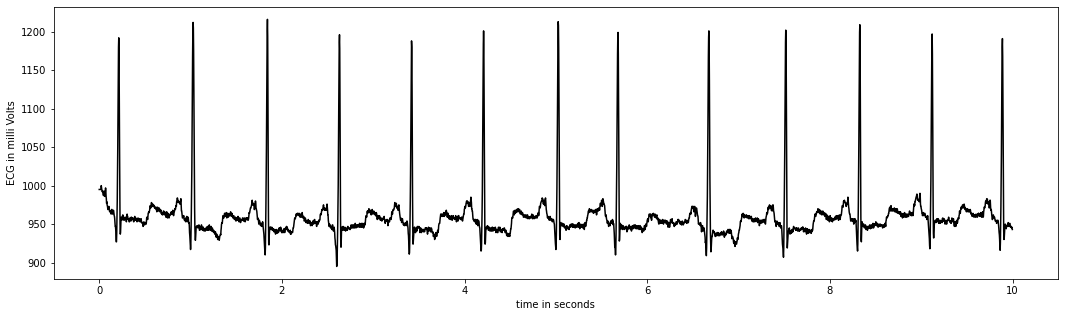

In [ ]:

# plotting time and ecg model
time_data=ecg/360
plt.figure(figsize=(18, 5))
plt.plot(time_data,ECG ,'k')

plt.xlabel("time in seconds")
plt.ylabel("ECG in milli Volts")


plt.show()

In [ ]:
from scipy.signal import find_peaks, peak_prominences

[  77  370  663  947 1231 1515 1809 2045 2403 2706 2998 3283 3560]
[1192 1212 1216 1196 1188 1201 1213 1199 1201 1202 1209 1197 1191]


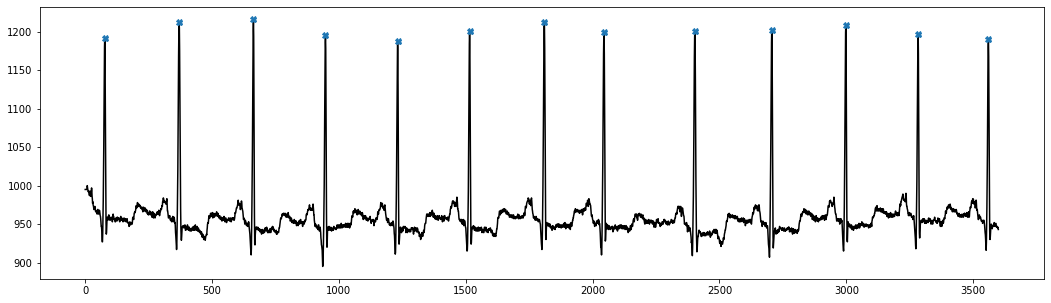

In [ ]:
peaks, _ = find_peaks(ECG, height=1050)
print(peaks)

plt.figure(figsize=(18, 5))
print(ECG[peaks])

plt.plot(ECG,'k')
plt.plot(peaks, ECG[peaks], "X")

plt.show()

In [ ]:
#sample difference value of each RR_interval
RR_interval=np.diff(peaks)
print(RR_interval)

#time interval betweens RR peaks
RR_interval_time=RR_interval/360
RR_interval_time

[293 293 284 284 284 294 236 358 303 292 285 277]


array([0.81388889, 0.81388889, 0.78888889, 0.78888889, 0.78888889,
       0.81666667, 0.65555556, 0.99444444, 0.84166667, 0.81111111,
       0.79166667, 0.76944444])

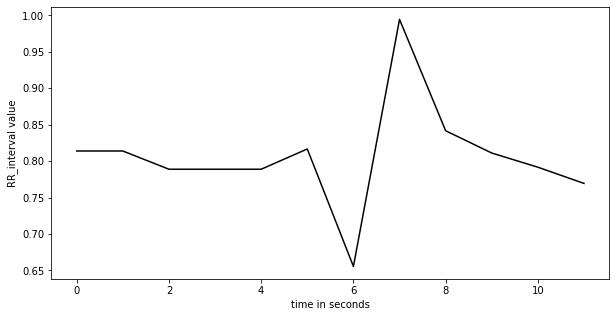

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(RR_interval_time,'k')
plt.xlabel("time in seconds")
plt.ylabel("RR_interval value")
plt.show()

In [ ]:
mean=np.mean(RR_interval_time)
mean

0.8062499999999999

In [ ]:
Std=np.std(RR_interval_time)
Std

0.07193787507544529

#**Question-2**

Given an ECG signal “inputECG.mat”, add random noise to it. The sampling rate is 360 Hz. (You may use numpy.random package for generating noise)

a. Perform synchronized averaging to remove the noise. Vary the number of realizations used for reconstruction of ECG signal. Plot the percentage root mean square difference (PRD) value versus the iteration number.

In [ ]:

mat1 = scipy.io.loadmat('inputECG.mat')
mat1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 25 12:30:29 2017',
 '__version__': '1.0',
 '__globals__': [],
 'inputECG': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

In [ ]:
ECG1 =  mat1['inputECG']


In [ ]:
ECG1, ECG1.shape

(array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16), (1, 3600))

In [ ]:
ecg1=np.arange(ECG1.size)
ECG1=ECG1.reshape(3600)
ECG1, ecg1

(array([995, 995, 995, ..., 946, 944, 943], dtype=uint16),
 array([   0,    1,    2, ..., 3597, 3598, 3599]))

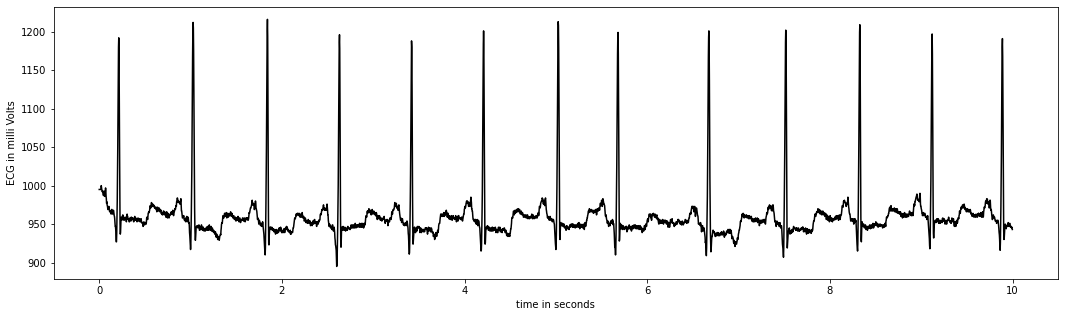

In [ ]:
time_data=ecg1/360
plt.figure(figsize=(18, 5))
plt.plot(time_data,ECG1,'k')

plt.xlabel("time in seconds")
plt.ylabel("ECG in milli Volts")

plt.show()

In [ ]:
noise=np.random.normal(0,10,3600)
output=ECG1+noise
output

array([999.38857332, 973.74224083, 993.90779885, ..., 946.14941008,
       941.54879366, 942.02602958])

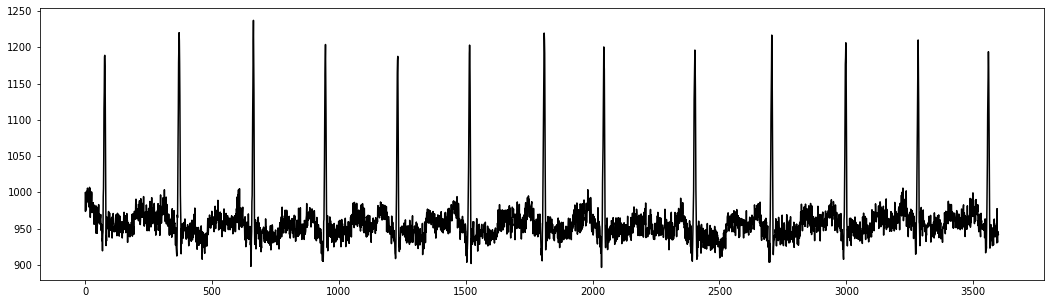

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(output,'k')

plt.show()

In [ ]:
def timeSynchronizedAverage(signal, no_iterations):

    input_sig = np.array([signal for i in range(N)])
    noise_sig = np.random.randn(input_sig.shape[0] ,input_sig.shape[1])


    output_ = input_sig + noise_sig

    Avg_sig = np.mean(output_, axis = 0)

    prd = np.sqrt((np.sum(np.square(Avg_sig - signal))/np.sum(np.square(signal))))*100
    return prd

#demo for understanding


In [ ]:
signal = ECG1
for N in range(1, 150,10):
  input_sig = np.array([signal for i in range(N)])
  print(input_sig,input_sig.shape)
  print(input_sig.shape[0])
  print(input_sig.shape[1])





[[995 995 995 ... 946 944 943]] (1, 3600)
1
3600
[[995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 ...
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]] (11, 3600)
11
3600
[[995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 ...
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]] (21, 3600)
21
3600
[[995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 ...
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]] (31, 3600)
31
3600
[[995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 ...
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]] (41, 3600)
41
3600
[[995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 [995 995 995 ... 946 944 943]
 ...
 [995 995

In [ ]:
#generation of noise signal array

noise_sig = np.random.randn(1,3600)
noise_sig


array([[-1.10512389,  0.05700723, -1.60022382, ...,  1.71324508,
         0.08992685, -0.28164693]])

In [ ]:
noise_sig.shape

(1, 3600)

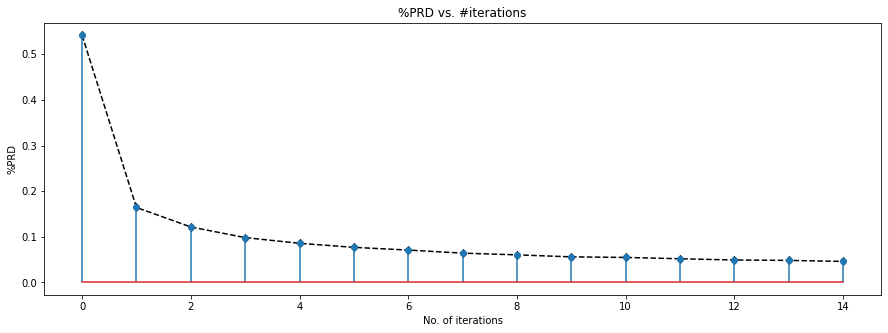

In [ ]:
PRMSD = []
for N in range(1, 150,10):
    PRMSD.append(timeSynchronizedAverage(ECG1, N))

plt.figure(figsize=(15,5))
plt.plot(PRMSD, 'kd--')
plt.stem(PRMSD,)


plt.ylabel("%PRD")
plt.xlabel("No. of iterations")
plt.title("%PRD vs. #iterations")
plt.show()


#**Question 3**

Given the ECG signal, “givenECG3.mat”. The sampling rate is 360 Hz.

a. Add baseline wander noise (0-1 Hz sinusoid) and powerline interference (50 Hz sinusoid) to it. Use various filters to eliminate these noises from ECG.

b. Compute PRD value between the filtered signal and the original ECG signal for each filtering case.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
mat3 = scipy.io.loadmat('givenECG3.mat')
mat3

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jan 10 19:30:32 2017',
 '__version__': '1.0',
 '__globals__': [],
 'givenECG3': array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16)}

In [ ]:
ECG2 =  mat3['givenECG3']


In [ ]:
ECG2 , ECG2.shape

(array([[995, 995, 995, ..., 946, 944, 943]], dtype=uint16), (1, 3600))

In [ ]:
ecg2=np.arange(ECG.size)
ECG2=ECG2.reshape(3600)
ECG2, ecg2

(array([995, 995, 995, ..., 946, 944, 943], dtype=uint16),
 array([   0,    1,    2, ..., 3597, 3598, 3599]))

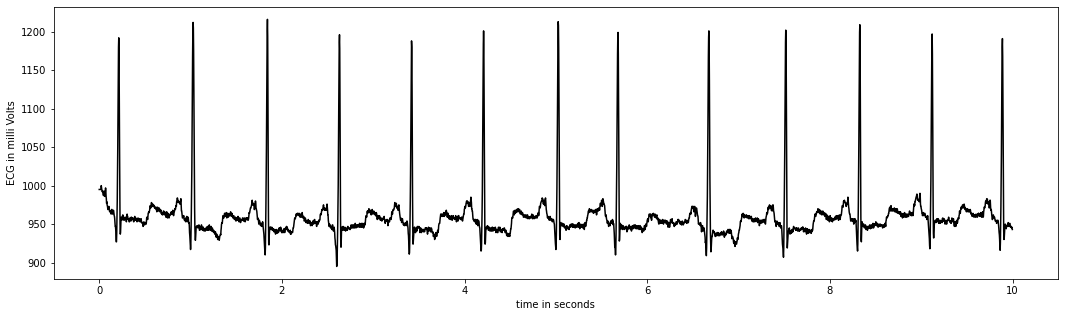

In [ ]:


# plotting time and ecg model
time_data2=ecg2/360
plt.figure(figsize=(18, 5))
plt.plot(time_data2,ECG2,'k')
plt.xlabel("time in seconds")
plt.ylabel("ECG in milli Volts")
plt.show()

#baseline_wander Noise

In [ ]:
#Creating baseline_wander
f = 0.5
fs = 360
print(np.pi)
ecg3 = ECG2.reshape((-1))
print(ecg3.size)

Amp = (max(ecg3) - min(ecg3))*0.5
time = np.arange(ecg3.size)/fs


print(np.arange(ecg3.size))
print(time)

baseline_wander = []
for i in range(len(time)):
  p = Amp * math.sin(2*np.pi*f*time[i])
  baseline_wander.append(p)


baseline_wander
print(len(baseline_wander))

3.141592653589793
3600
[   0    1    2 ... 3597 3598 3599]
[0.00000000e+00 2.77777778e-03 5.55555556e-03 ... 9.99166667e+00
 9.99444444e+00 9.99722222e+00]
3600


In [ ]:
#Adding baseline_wander to ecg signal
signal_bw = np.array(ecg3) + np.array(baseline_wander)

In [ ]:
signal_bw

array([995.        , 996.40060895, 997.80111123, ..., 941.7985998 ,
       941.19888877, 941.59939105])

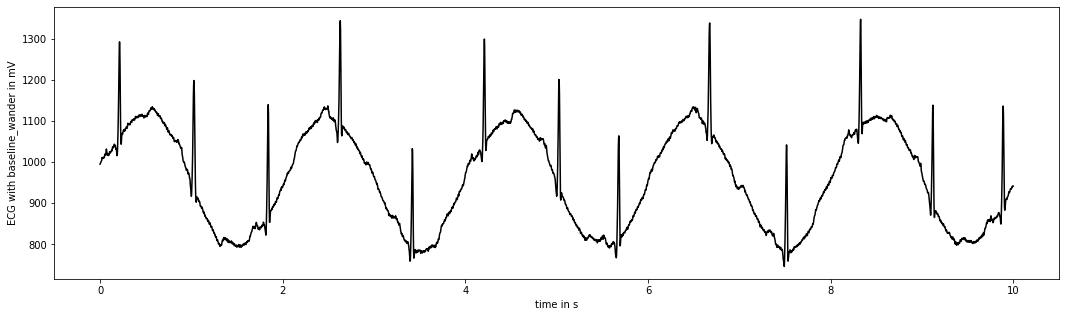

[995.         996.40060895 997.80111123 ... 941.7985998  941.19888877
 941.59939105]


In [ ]:
#Plot ECG signal with baseline wander
fs = 360
time = np.arange(signal_bw.size) / fs

plt.figure(figsize=(18, 5))
plt.plot(time, signal_bw ,'k')

plt.xlabel("time in s")
plt.ylabel("ECG with baseline_wander in mV")
plt.show()
print(signal_bw)

In [ ]:
from scipy.signal import butter, filtfilt


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    # print(b,a)
    y = filtfilt(b, a, data)
    # print(y)
    return y

# rawdata = np.loadtxt('sampleSignal.txt', skiprows=0)
signal = signal_bw
fs = 360

cutoff = 1
order = 5
conditioned_signal = butter_highpass_filter(signal_bw, cutoff, fs, order)
print(conditioned_signal)

[-12.08377125 -11.33908543 -10.59918551 ...  -6.18225438  -7.53033435
  -7.86300027]


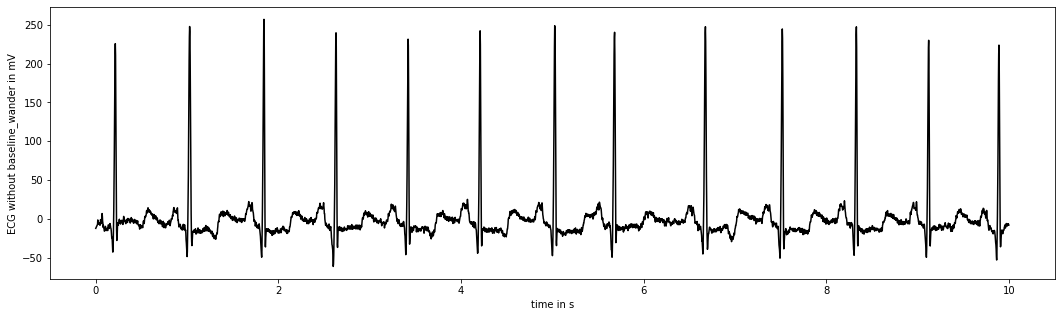

[-12.08377125 -11.33908543 -10.59918551 ...  -6.18225438  -7.53033435
  -7.86300027]


In [ ]:
#Plot of ECG signal without baseline wander
fs = 360
time = np.arange(conditioned_signal.size) / fs

plt.figure(figsize=(18, 5))
plt.plot(time, conditioned_signal ,'k')
plt.xlabel("time in s")
plt.ylabel("ECG without baseline_wander in mV")
plt.show()
print(conditioned_signal)

In [ ]:
#Finding dc value of the ecg signal and adding it to the conditioned signal obtained from high pass filter

dc_value = np.mean(ecg3)
print(dc_value)
reconstructed_signal = conditioned_signal + dc_value
reconstructed_signal

960.0155555555556


array([947.93178431, 948.67647013, 949.41637004, ..., 953.83330117,
       952.48522121, 952.15255529])

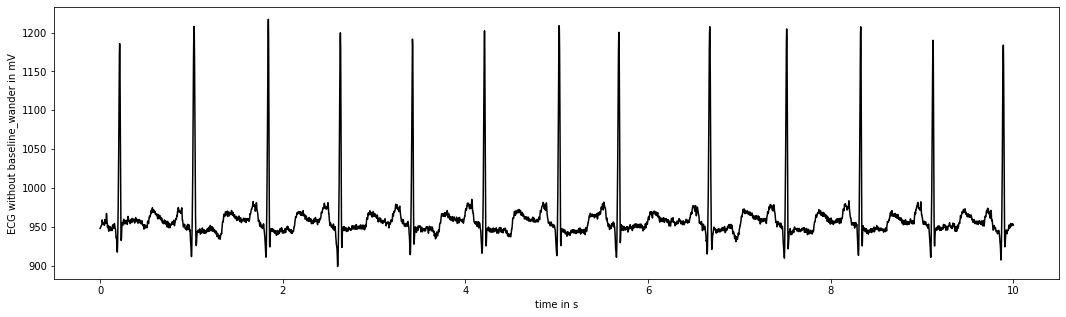

[947.93178431 948.67647013 949.41637004 ... 953.83330117 952.48522121
 952.15255529]


In [ ]:
#Plot of reconstructed signal
fs = 360
time = np.arange(reconstructed_signal.size) / fs
plt.figure(figsize=(18, 5))
plt.plot(time, reconstructed_signal ,'k')
plt.xlabel("time in s")
plt.ylabel("ECG without baseline_wander in mV")
plt.show()
print(reconstructed_signal)

In [ ]:
#Find PRD
s=0
r=0
for i in range(len(reconstructed_signal)):
  s = s + (ecg3[i] - reconstructed_signal[i]) **2
  r = r + (ecg3[i])**2


In [ ]:
print(s)
print(r)

127751.04723059158
3322040050


In [ ]:
prd1 = np.sqrt(s/r)*100
prd1

0.6201258031166288

#Powerline Noise

In [ ]:
#Creating Powerline interference
f = 50
fs = 360
ecg3 = mat3['givenECG3'].reshape((-1))
print(ecg3.size)


Amp = (max(ecg3) - min(ecg3))*0.5
time = np.arange(ecg3.size)/fs
print(np.arange(ecg3.size))
print(time)


powerline_interference = []
for i in range(len(time)):
  w = Amp * math.sin(2*np.pi*f*time[i])
  powerline_interference.append(w)


powerline_interference
print(len(powerline_interference))

3600
[   0    1    2 ... 3597 3598 3599]
[0.00000000e+00 2.77777778e-03 5.55555556e-03 ... 9.99166667e+00
 9.99444444e+00 9.99722222e+00]
3600


In [ ]:
#Adding powerline interference to ecg signal
signal_pi = np.array(ecg3) + np.array(powerline_interference)

In [ ]:
signal_pi

array([ 995.        , 1117.95013312, 1153.06164436, ...,  865.75      ,
        785.93835564,  820.04986688])

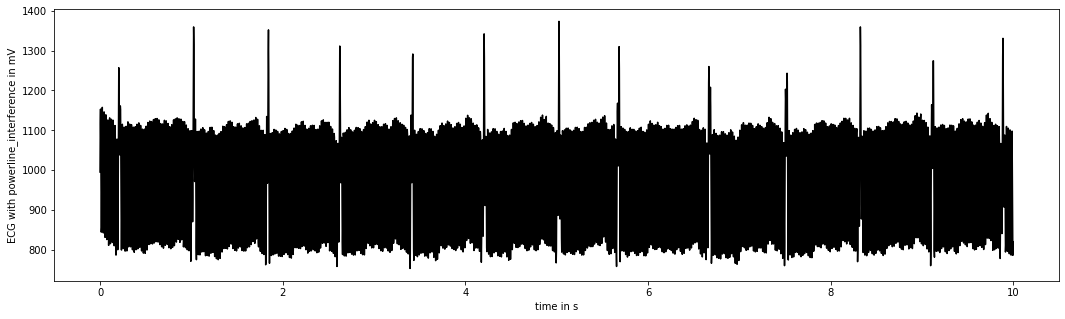

[ 995.         1117.95013312 1153.06164436 ...  865.75        785.93835564
  820.04986688]


In [ ]:
#Plot of ECG signal with powerline_interference
fs = 360
time = np.arange(signal_pi.size) / fs

plt.figure(figsize=(18, 5))
plt.plot(time, signal_pi,'k')
plt.xlabel("time in s")
plt.ylabel("ECG with powerline_interference in mV")
plt.show()
print(signal_pi)

In [ ]:
#Notch filter for removing of powerline interference from ecg signal
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter


def notch_filter(cutoff, q):
    nyq = 0.5*fs
    freq = cutoff/nyq
    b, a = iirnotch(freq, q)
    return b, a


def notch(data, powerline, q):
    b,a = notch_filter(powerline,q)
    z = lfilter(b,a,data)
    return z





signal = signal_pi
fs = 360
powerline = 50
order = 6
q=20

filtered_signal = notch(signal_pi,powerline,q)


In [ ]:
filtered_signal

array([ 973.75264177, 1067.34549437, 1106.35944234, ...,  942.85095821,
        943.0135821 ,  944.83757916])

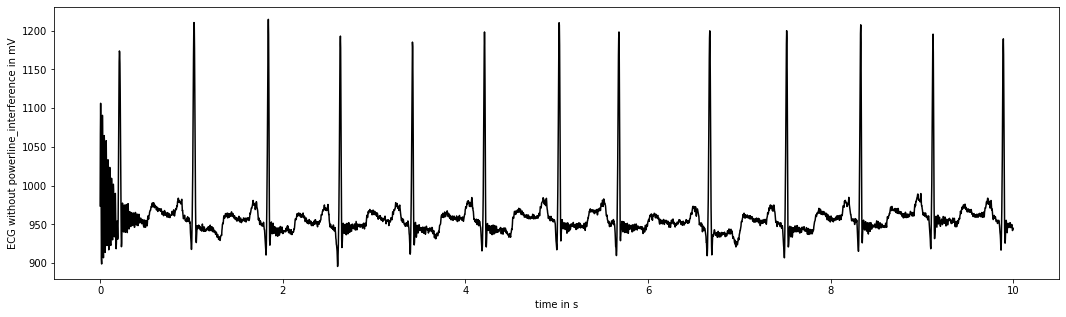

[ 973.75264177 1067.34549437 1106.35944234 ...  942.85095821  943.0135821
  944.83757916]


In [ ]:
#Plot of ECG signal without powerline interference
fs = 360
time = np.arange(filtered_signal.size) / fs
plt.figure(figsize=(18, 5))
plt.plot(time, filtered_signal ,'k')
plt.xlabel("time in s")
plt.ylabel("ECG without powerline_interference in mV")
plt.show()
print(filtered_signal)

In [ ]:
#Find PRD
b = 0
a = 0
for i in range(len(filtered_signal)):
  a = a + (ecg3[i] - filtered_signal[i])**2
  b = b + ecg3[i]**2

c=a/b


In [ ]:
prd2 = np.sqrt(c) * 100

In [ ]:
prd2

0.710973427017357